# Pandas Basics  <hr style = "border:2.5px solid #F29367"></hr>

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Data Analyst: Sam T. Sabidalas <br>
Department: Electrical Engineering

In [272]:
data = {
    "name":['CJ', 'Jaymark', 'Sam'],
    "age": [21, 20, 18],
    "sex": ['F', 'M', 'M']
}
data

{'name': ['CJ', 'Jaymark', 'Sam'], 'age': [21, 20, 18], 'sex': ['F', 'M', 'M']}

In [273]:
df = pd.DataFrame(data)
df

,name,age,sex
0,CJ,21,F
1,Jaymark,20,M
2,Sam,18,M


In [274]:
df["age"].sum()

59

In [275]:
df["age"].mean()

19.666666666666668

# Correlation

In [283]:
measurements = {
    "Current": [2, 3.5, 1.8, 4.2, 2.7],
    "Power": [100, 200, 90, 210, 110]
}
measurements

{'Current': [2, 3.5, 1.8, 4.2, 2.7], 'Power': [100, 200, 90, 210, 110]}

In [284]:
table = pd.DataFrame(measurements)
table

,Current,Power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [285]:
table.cov()

,Current,Power
Current,1.023,56.15
Power,56.150,3370.00


In [286]:
table.corr()

,Current,Power
Current,1.000000,0.956306
Power,0.956306,1.000000


In [287]:
table.describe()

,Current,Power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


## Scatter Plot

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

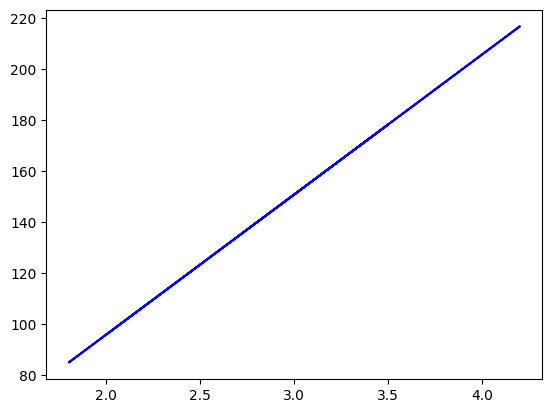

In [293]:
x = table ["Current"]
y = table ["Power"]

# regression line
m, b , r_value, p_value, std_err = stats.linregress(x,y)
line = m*x + b

plt.plot(x,line,
         color= "blue",
         label=f'regression line(r={r_value:.3f})')

#Scatter
plt.scatter(x,y,
            color = "greeen",
            label = "data points")
plt.title("Device Current and Power Response")
plt.ylabel("Power (W)")
plt.xlabel("Current (A)")
plt.show()

# Resistance Test

In [ ]:
resistance = pd.read_csv(r"resistance-test.csv")
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [ ]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 392.0 bytes


In [ ]:
jag_mean = resistance["Jaguar"].mean()
jag_mean

9.399999999999999

In [ ]:
pan_mean =resistance["Panther"].mean()
pan_mean

10.75

In [ ]:
resistance["Panther"]= resistance["Panther"].fillna(pan_mean)
resistance


,Test No.,Jaguar,Panther
0,1,10.6,10.10
1,2,9.1,11.00
2,3,9.3,9.10
3,4,9.8,20.00
4,5,10.5,9.20
5,6,10.4,10.80
6,7,9.5,9.90
7,8,11.0,9.20
8,9,10.4,9.10
9,10,3.0,9.10


In [ ]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   11 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 392.0 bytes


# Bar Graph

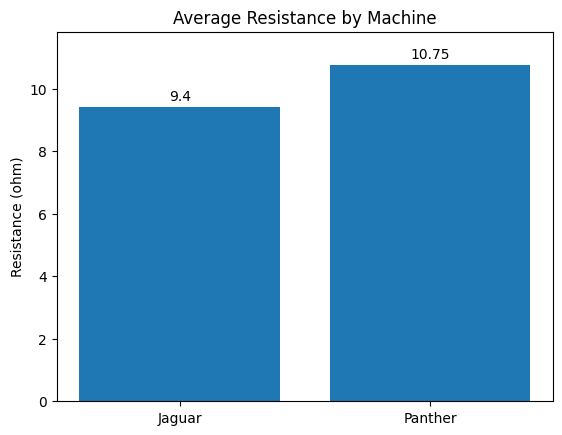

In [ ]:
bars= plt.bar(["Jaguar", "Panther"], [jag_mean, pan_mean])
plt.title("Average Resistance by Machine")
plt.ylabel("Resistance (ohm)")

# bar labels
plt.bar_label(bars, padding=3)
plt.margins(y=0.1) #10%

plt.show()
        